## Добро пожаловать на страницу решения тестового задания
### Решение от Надира Альпеисова

In [ ]:
'''
readme:
- для просмотра решения для всех ячеек нужно нажать play.
- весь код написан в виде функций для возможного повторного использования.
- графики сделаны исключительно для иллюстрации зависимостей, в основном для 
анализа использовались корреляционные матрицы
'''

### 1/ Зависимость между ранками по блокам и изменением цены (и ранками по изменению цены)

#### Импорт необходимых библиотек

In [534]:
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#### Импорт документа (dataset-а)

In [535]:
def load_dataset():
    
    df = pd.read_excel(r"/Users/zvezdaetogodoma/Downloads/Задача для кандидата на DS.xlsx", sheet_name="Dataframe")
    
    return df

df_main = load_dataset()

#### Создание датасета с ранками по блокам и ценами по периодам (и ранками по изменению цены)

In [467]:
# Выбор столбцов для создания датафрейма с ценами по периодам
dependent_v1 = ['Perf_3M', 'Perf_1Y', 'Perf_3Y', 'Perf_5Y']
# Выбор столбцов для создания датафрейма с ранками по изменению цены
dependent_v2 = ['Rank_Perf_3M_prc', 'Rank_Perf_1Y_prc', 'Rank_Perf_3Y_prc', 'Rank_Perf_5Y_prc']

def creating_dataset(dataset, v):
    
    df1 = dataset.iloc[:, 1:13]
    df2 = dataset[v]    
    result1 = pd.concat([df1, df2], axis=1, join='inner')

    return result1

dataset1 = creating_dataset(df_main, dependent_v1)
# print(dataset1)

dataset2 = creating_dataset(df_main, dependent_v2)
# print(dataset2)

#### Анализ данных
#### Создание корреляционной матрицы

In [538]:
def compute_correlations_matrix(dataset, v):
    
    corrM = dataset.corr(method='pearson')[v]
    
    return corrM

corrM_1 = compute_correlations_matrix(dataset1, dependent_v1).sort_values(by=dependent_v1[0], ascending=False)
print(corrM_1)
corrM_2 = compute_correlations_matrix(dataset2, dependent_v2).sort_values(dependent_v2[0], ascending=False)
print(corrM_2)

                          Perf_3M   Perf_1Y   Perf_3Y   Perf_5Y
Perf_3M                  1.000000  0.999462  0.103122  0.069781
Perf_1Y                  0.999462  1.000000  0.268284  0.204809
Perf_3Y                  0.103122  0.268284  1.000000  0.651339
Perf_5Y                  0.069781  0.204809  0.651339  1.000000
RANK_Forecast_prc        0.038342  0.063754  0.088737  0.076714
RANK_Dividend_prc        0.013003       NaN       NaN       NaN
RANK_Price_momentum_prc  0.005875  0.006155  0.012563  0.023303
Rank_RANK_8_prc          0.001339  0.001178 -0.005482  0.003507
RANK_Value_prc           0.000398  0.000512 -0.012569  0.012559
RANK_Industry_prc        0.000107  0.000136 -0.013721 -0.011051
RANK_Credit_prc         -0.000392 -0.000560 -0.000661  0.001601
Rank_RANK_4_prc         -0.000598 -0.000904  0.004736  0.010728
Rank_RANK_5_prc         -0.000902 -0.001180 -0.001062  0.006882
Rank_RANK_6_prc         -0.001302 -0.001666 -0.010417 -0.006425
RANK_Growth_prc         -0.001530 -0.001

In [ ]:
'''
1/ Комментарии по ценам по периодам

На основе данных с матрицы выше, видно что: 
1. За период 3 месяца и 1 год прослеживаются следующие относительно сильные зависимости:
- для 3 месяцев это RANK_Forecast_prc (0,38), RANK_Dividend_prc (0.013), RANK_Price_momentum_prc (0.0058), Rank_RANK_8_prc (0.0013), отрицательные, обратная зависимость, по модулю - RANK_ESG_prc (-0.034), RANK_Growth_prc (-0.0015), Rank_RANK_6_prc (-0.0013)  
- для 1 года это RANK_Forecast_prc (0.063), RANK_Price_momentum_prc (0.0061), Rank_RANK_8_prc (0.0011), и RANK_ESG_prc (-0.056), RANK_Growth_prc (-0.0018), Rank_RANK_6_prc (-0.0016).
2. За период 3 и 5 лет появляются еще более сильные зависимости. 
- для 3 лет: RANK_Forecast_prc (0.088), RANK_Price_momentum_prc (0.012), и RANK_ESG_prc (-0.078), RANK_Industry_prc (-0.013), RANK_Value_prc (-0.012), Rank_RANK_6_prc (-0.010)
- для 5 лет: RANK_Forecast_prc (0.076), RANK_Price_momentum_prc (0.023), RANK_Value_prc (0.012), Rank_RANK_4_prc (0.010), и RANK_ESG_prc (-0.067), RANK_Growth_prc (-0.013).

'''

In [ ]:
'''
2/ Комментарии по ранкам по изменению цены

Для ранков по изменению цены в основном характерны коэффициенты сотого порядка, начиная от трехмесячного периода до 5 лет: 
- для 3 месяцев это Rank_RANK_6_prc(0.043), Rank_RANK_4_prc (0.040), Rank_RANK_5_prc (0.037)
- для 1 года это также Rank_RANK_6_prc(0.045), Rank_RANK_4_prc (0.045), Rank_RANK_5_prc (0.039)
- для 3 лет это Rank_RANK_4_prc (0.074), Rank_RANK_5_prc (0.064), Rank_RANK_6_prc(0.062)
- для 5 лет это Rank_RANK_4_prc (0.083), Rank_RANK_5_prc (0.076), Rank_RANK_6_prc(0.068)

'''

#### Графики

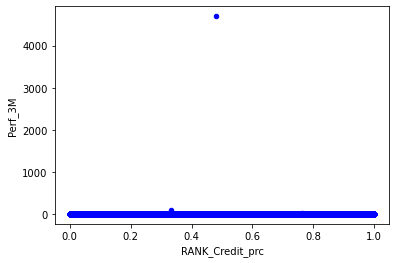

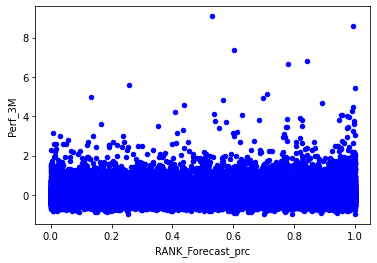

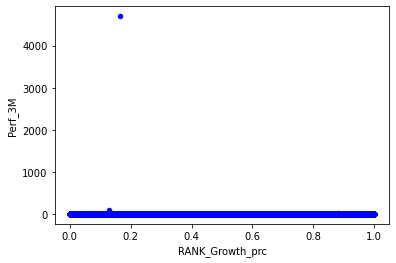

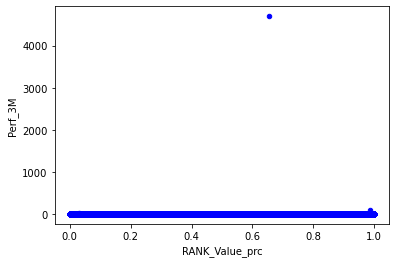

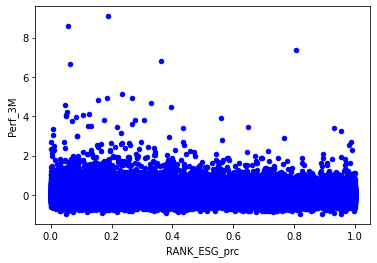

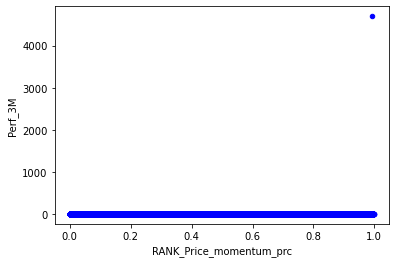

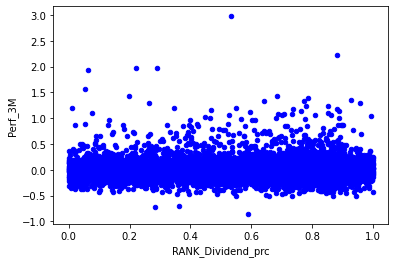

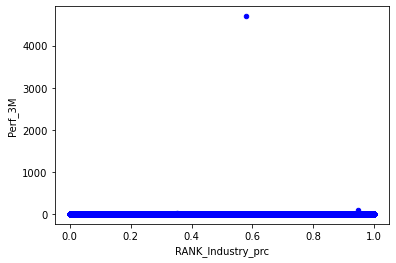

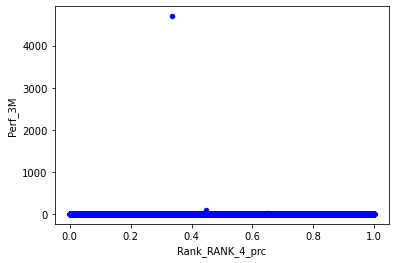

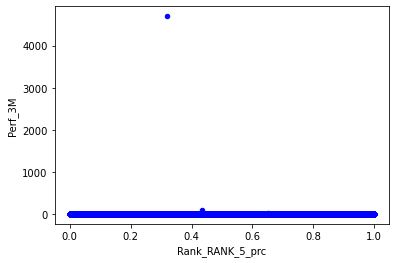

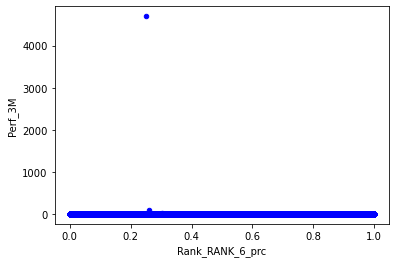

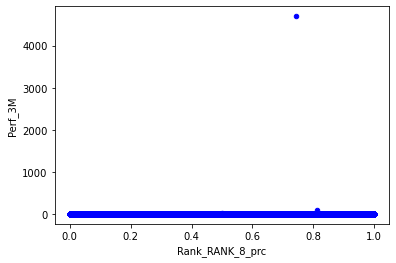

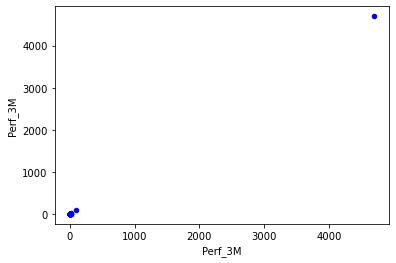

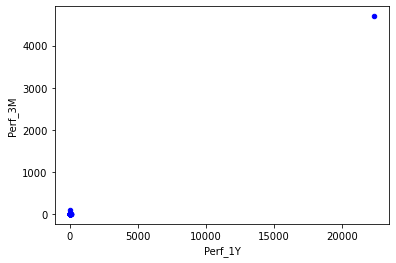

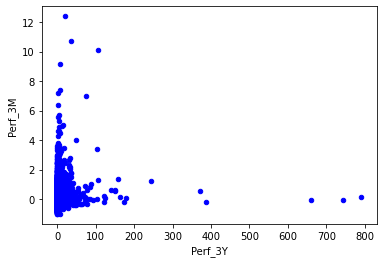

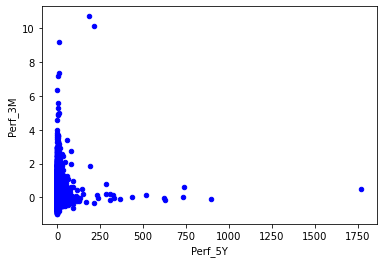

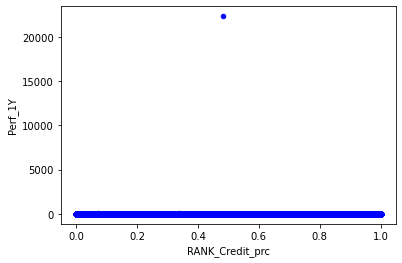

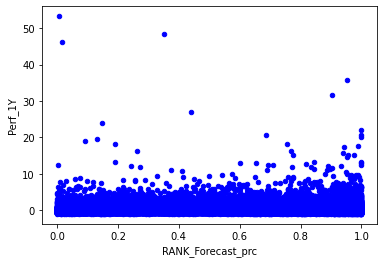

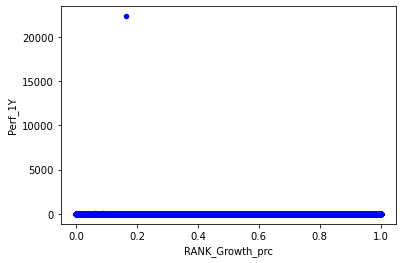

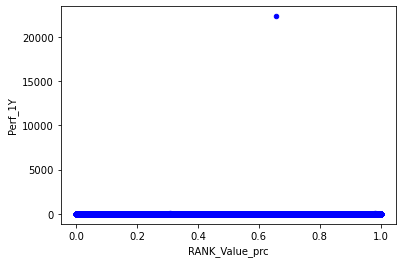

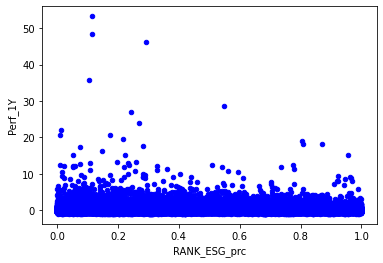

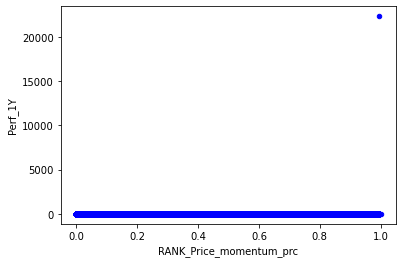

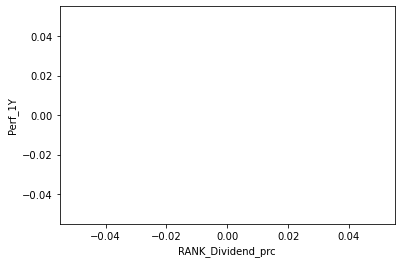

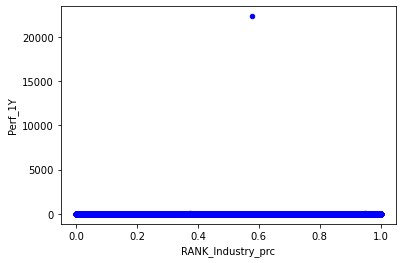

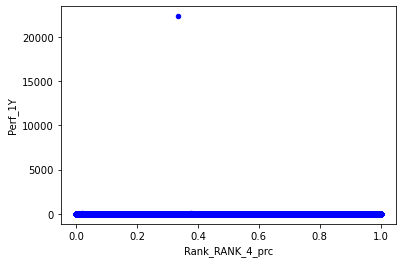

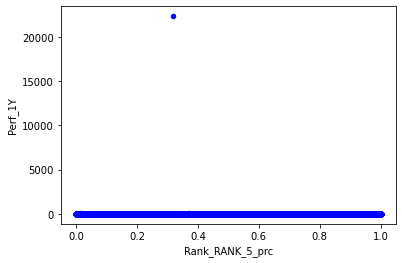

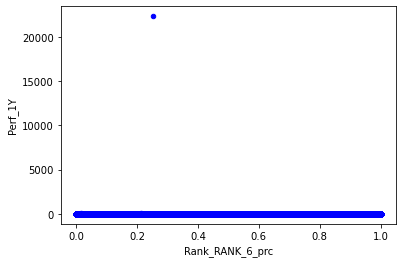

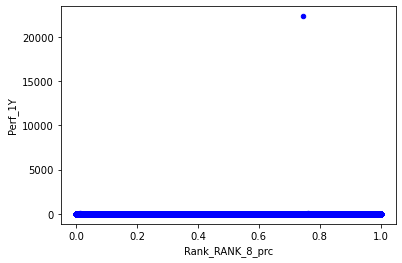

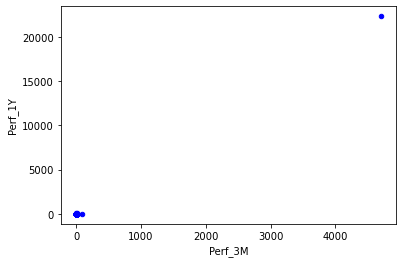

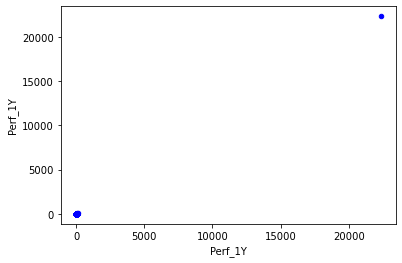

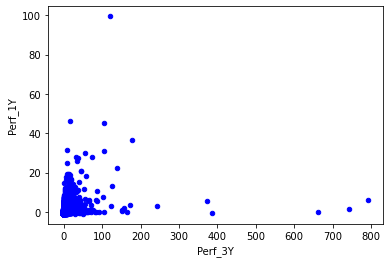

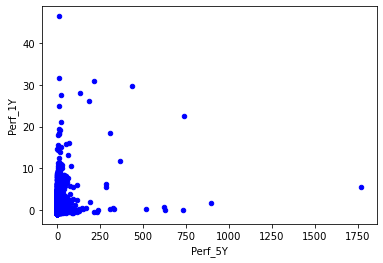

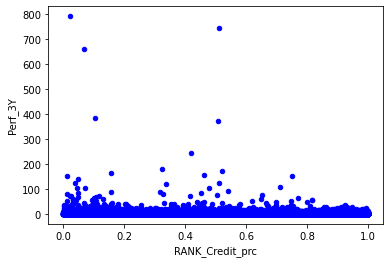

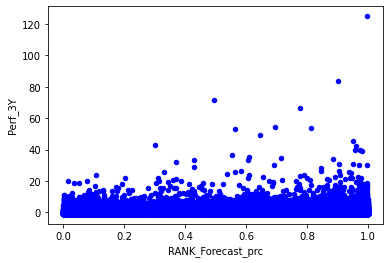

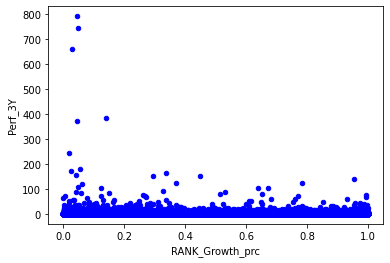

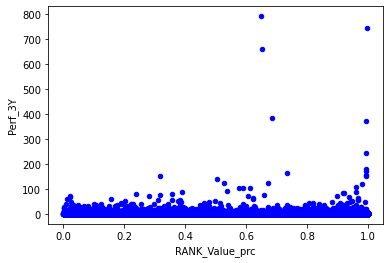

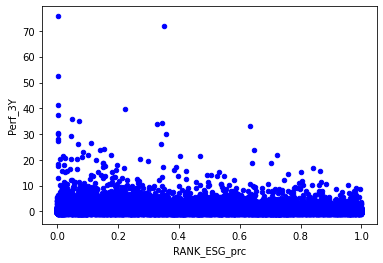

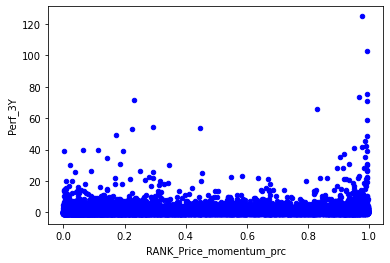

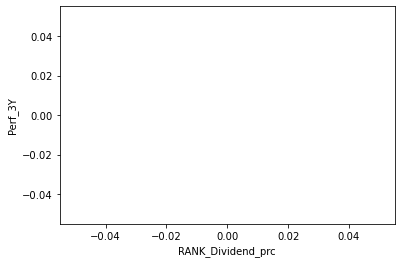

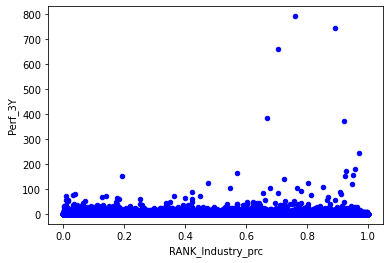

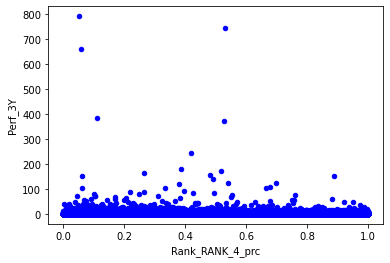

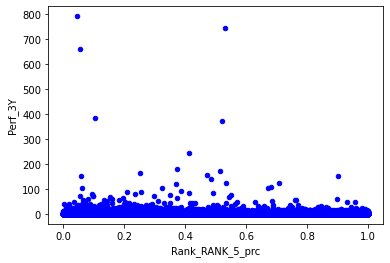

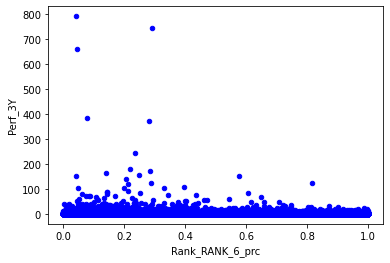

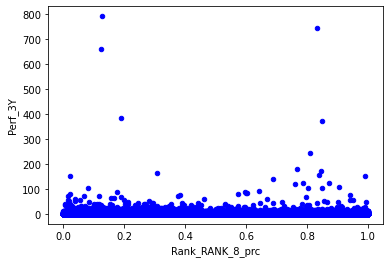

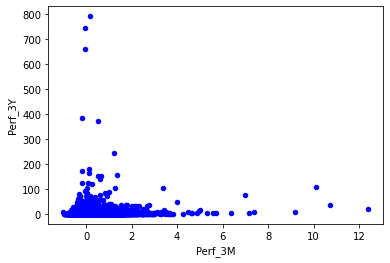

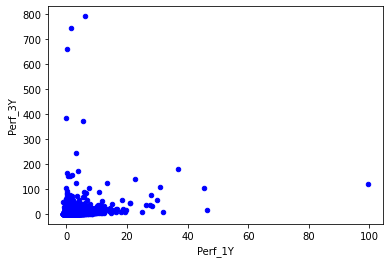

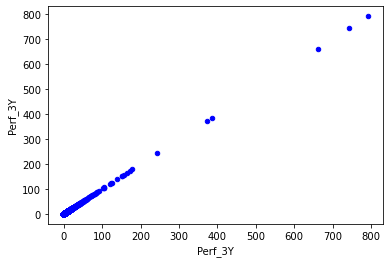

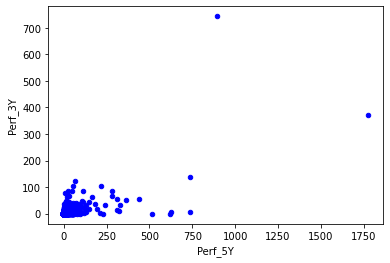

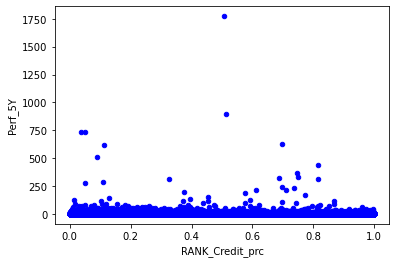

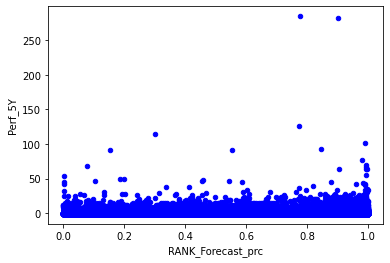

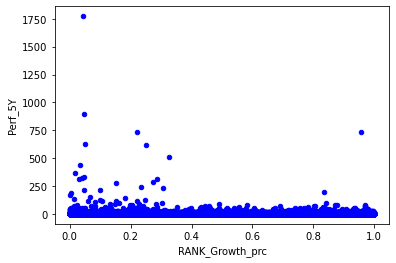

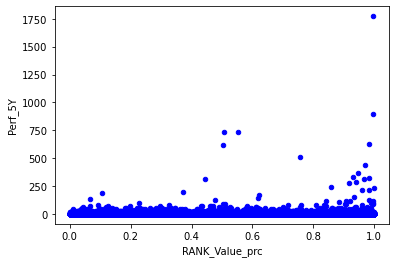

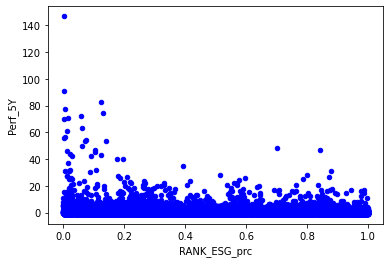

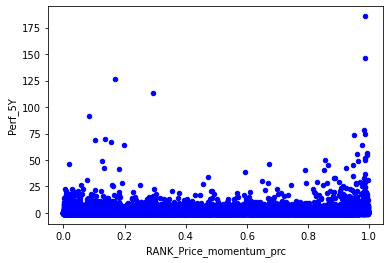

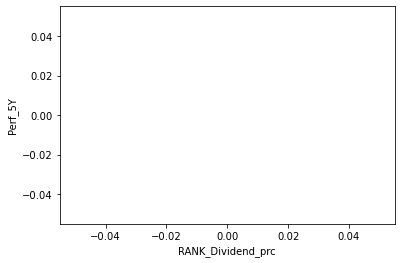

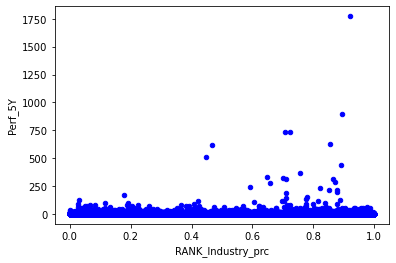

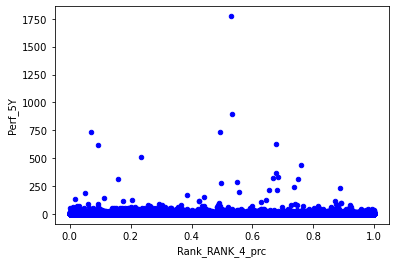

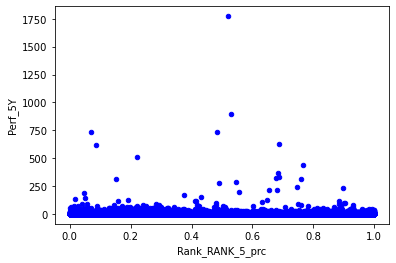

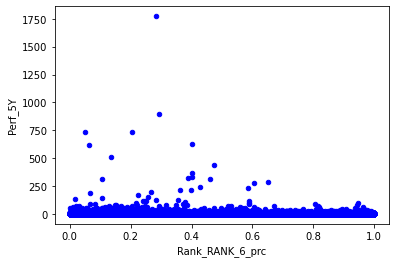

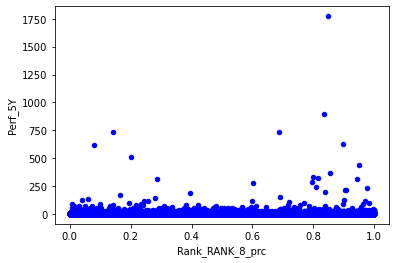

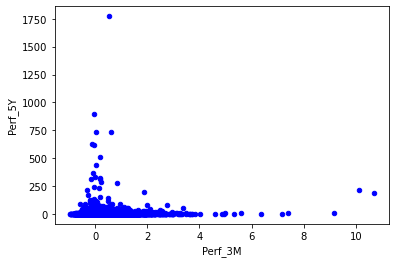

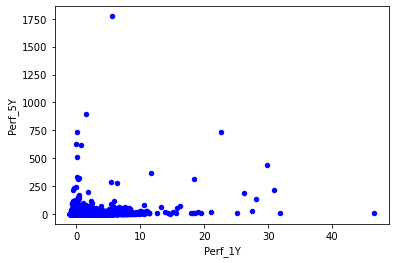

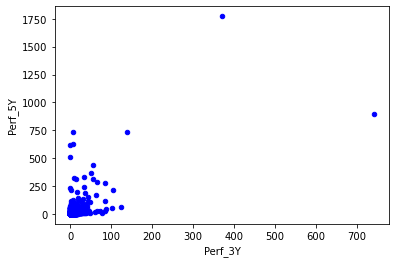

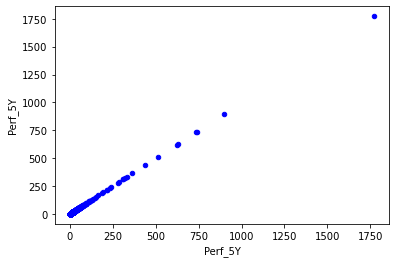

In [469]:
# для иллюстрации можно отобразить данные в виде графиков
def two_var_plot(dataset, v): #function for plotting two variables graphs
    
    lst = list(dataset.columns)
    for v2 in v:
        for i in lst:
            df = pd.DataFrame(columns=[i, v2])
            ax1 = dataset.plot.scatter(x=i, y=v2, c='Blue')
            plt.show()
    
two_var_plot(dataset1, dependent_v1)

### 2/ Зависимость между ранками по блокам и разницей между изменением цены компании и всего рынка (SPY)

#### Создание датасета с разницей между изменением цены компании и всего рынка SPY

In [470]:
dependent_v1_and_market_values = ['Perf_3M', 'Perf_1Y', 'Perf_3Y', 'Perf_5Y', 'Perf_SPY_3M', 'Perf_SPY_1Y', 'Perf_SPY_3Y', 'Perf_SPY_5Y']
dataset3 = creating_dataset(df_main, dependent_v1_and_market_values)
# print(dataset3)

def new_columns_for_dataset3(dataset):
    
    dataset['Perf_3M_diff'] = dataset['Perf_3M'] - dataset['Perf_SPY_3M']
    dataset['Perf_1Y_diff'] = dataset['Perf_1Y'] - dataset['Perf_SPY_1Y']
    dataset['Perf_3Y_diff'] = dataset['Perf_3Y'] - dataset['Perf_SPY_3Y']
    dataset['Perf_5Y_diff'] = dataset['Perf_5Y'] - dataset['Perf_SPY_5Y']
    lst = list(dataset.columns)[-4:]
    
    return dataset.drop(columns=dependent_v1_and_market_values), lst

dataset3_fin, lst_new = new_columns_for_dataset3(dataset3)
# print(dataset3_fin)

#### Анализ данных
#### Создание корреляционной матрицы

In [471]:
corrM_3 = compute_correlations_matrix(dataset3_fin, lst_new).sort_values(lst2[-4], ascending=False)
print(corrM_3)

                         Perf_3M_diff  Perf_1Y_diff  Perf_3Y_diff  \
Perf_3M_diff                 1.000000      0.999498      0.107749   
Perf_1Y_diff                 0.999498      1.000000      0.272022   
Perf_3Y_diff                 0.107749      0.272022      1.000000   
Perf_5Y_diff                 0.069214      0.202133      0.651919   
RANK_Forecast_prc            0.041740      0.065425      0.088489   
RANK_Dividend_prc            0.013003           NaN           NaN   
RANK_Price_momentum_prc      0.005880      0.006158      0.013015   
Rank_RANK_8_prc              0.001360      0.001196     -0.005161   
RANK_Value_prc               0.000407      0.000523     -0.012020   
RANK_Industry_prc            0.000176      0.000202     -0.013508   
RANK_Credit_prc             -0.000371     -0.000554     -0.000903   
Rank_RANK_4_prc             -0.000601     -0.000911      0.004992   
Rank_RANK_5_prc             -0.000906     -0.001187     -0.000797   
Rank_RANK_6_prc             -0.001

In [ ]:
'''
3/ Комментарии по нового параметру - разницей между изменением цены компании и всего рынка SPY

Зависимость разницы между изменением цены компании и всего рынка(SPY) 
от ранков по блокам характеризуется следующими показателями:
- для 3 месяцев это RANK_Forecast_prc (0.041), RANK_Dividend_prc (0.013), RANK_ESG_prc (-0.036)
- для 1 года это также RANK_Forecast_prc (0.065), RANK_ESG_prc (-0.057)
- для 3 лет RANK_Forecast_prc (0.088), RANK_Price_momentum_prc (0.013), RANK_ESG_prc (-0.078), RANK_Industry_prc (-0.013)
- для 5 лет RANK_Forecast_prc (0.076), RANK_Price_momentum_prc (0.023), RANK_ESG_prc (-0.067), 

'''

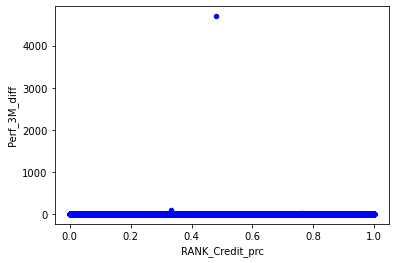

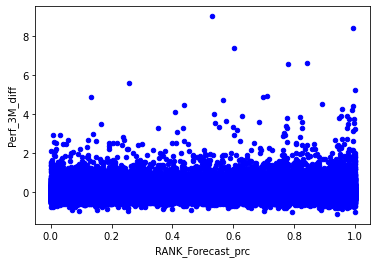

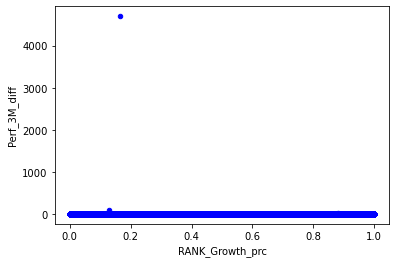

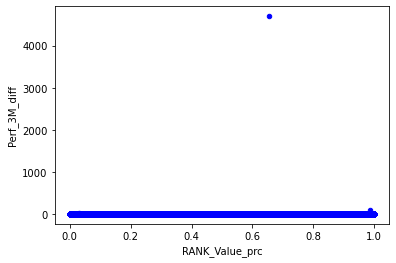

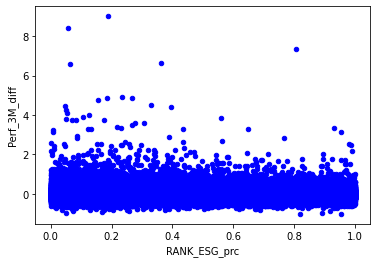

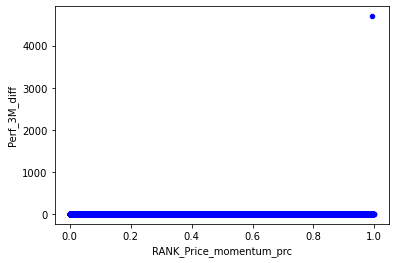

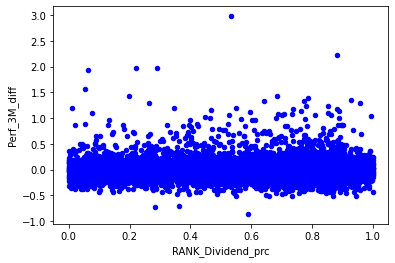

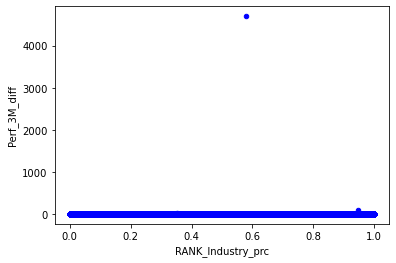

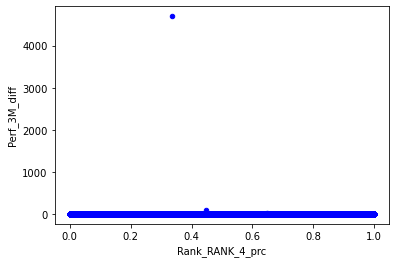

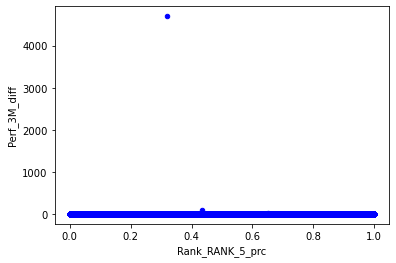

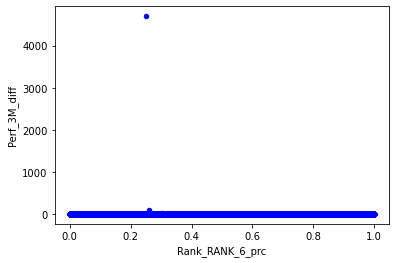

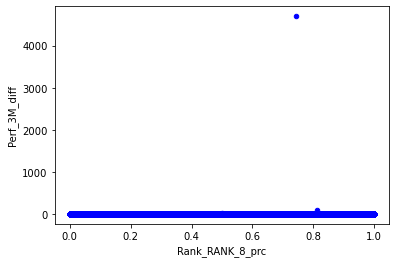

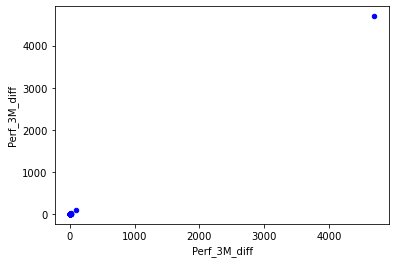

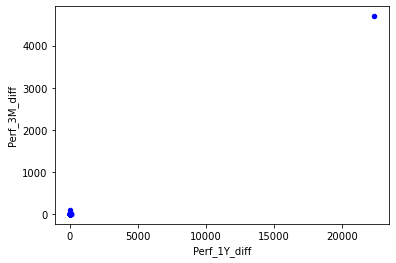

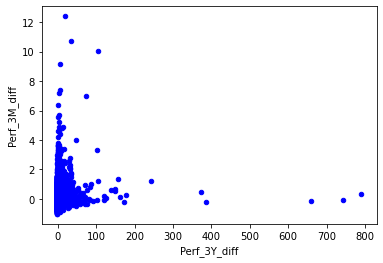

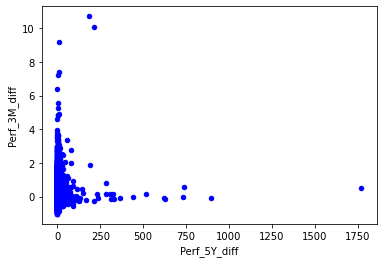

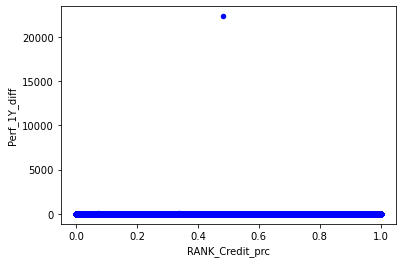

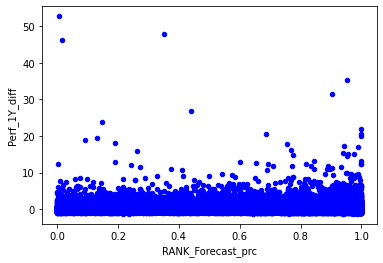

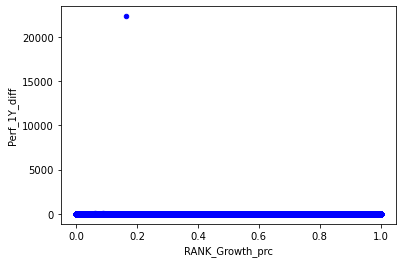

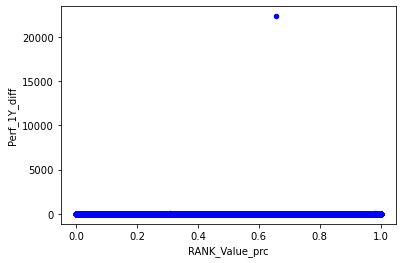

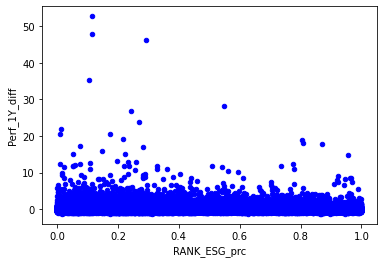

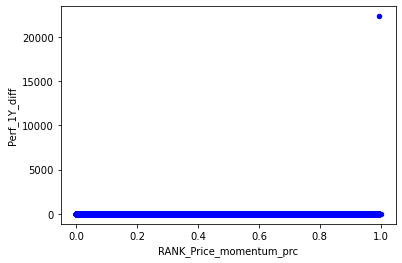

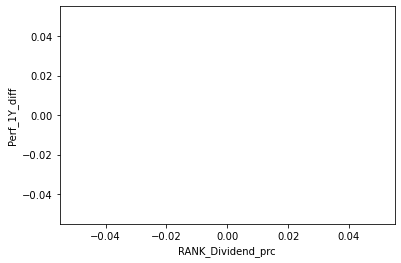

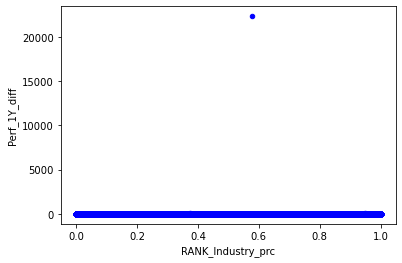

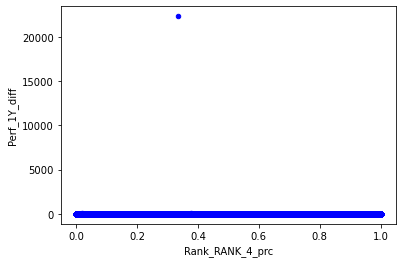

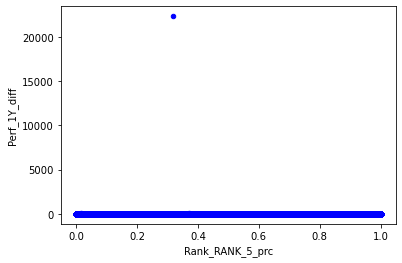

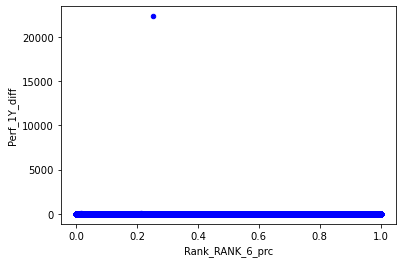

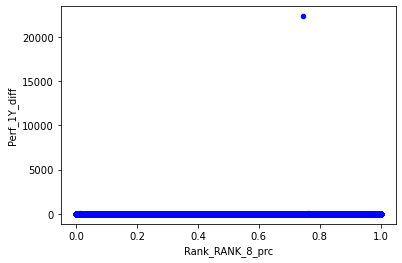

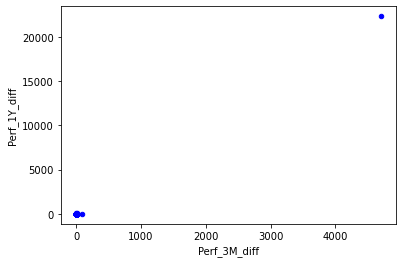

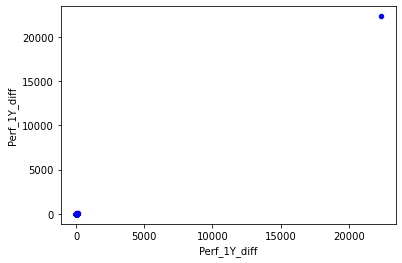

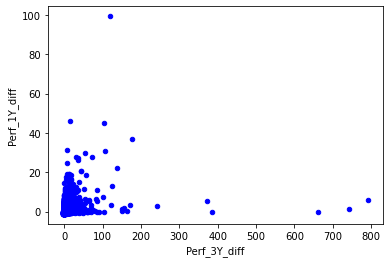

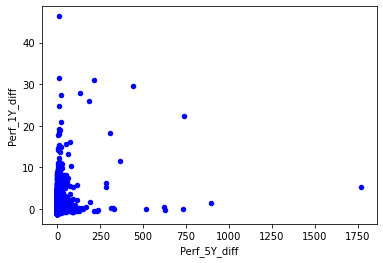

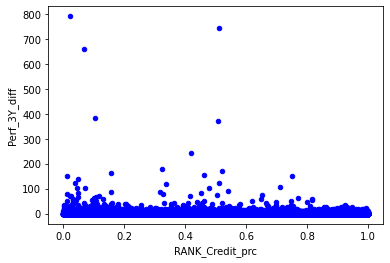

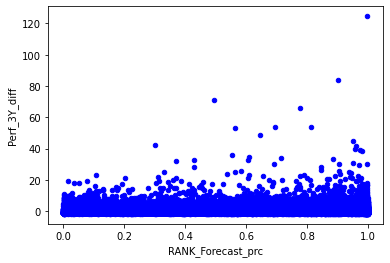

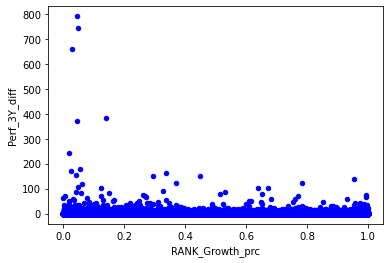

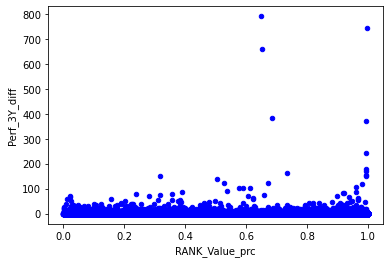

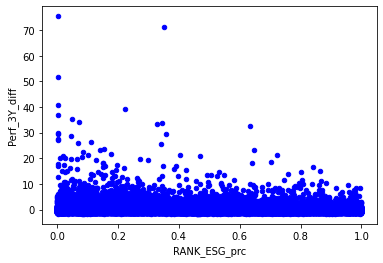

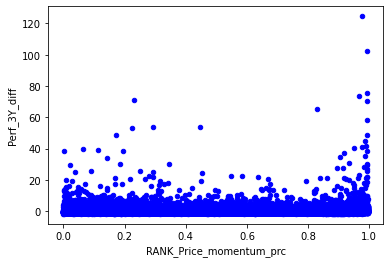

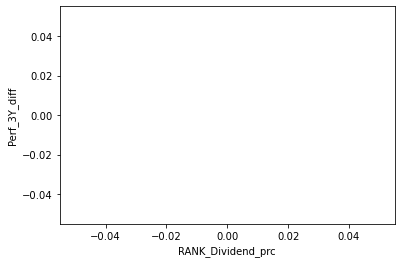

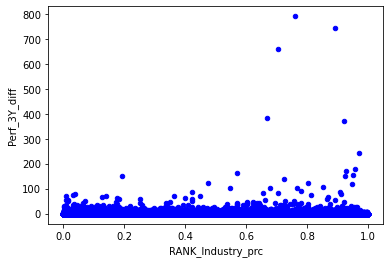

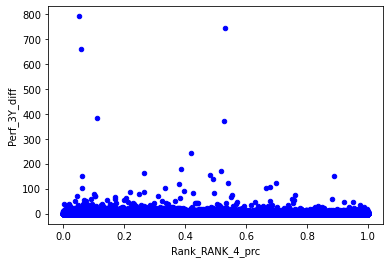

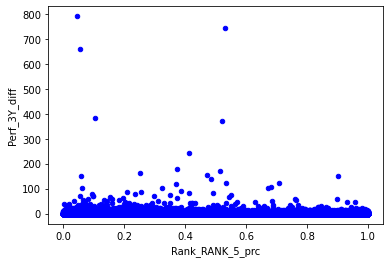

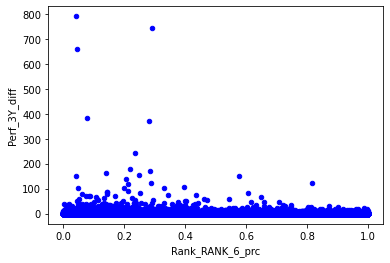

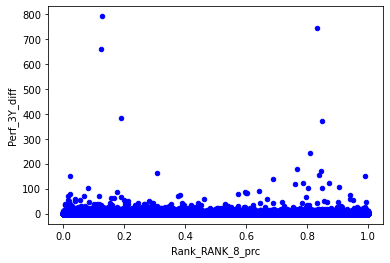

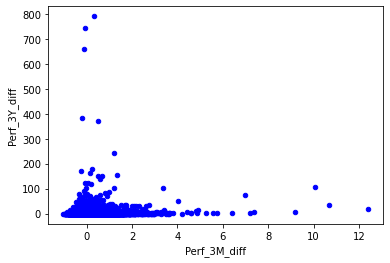

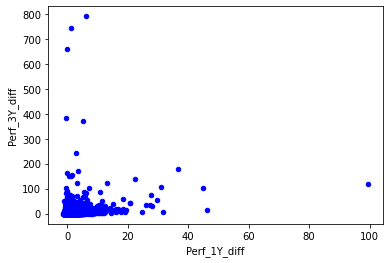

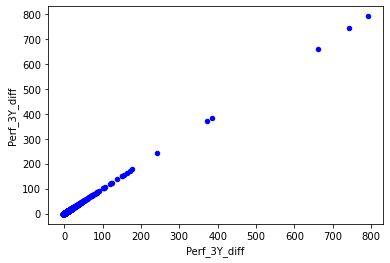

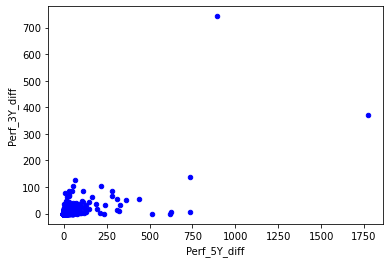

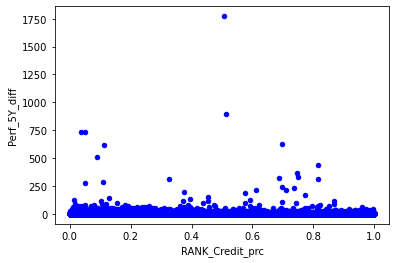

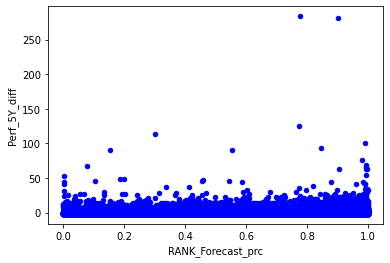

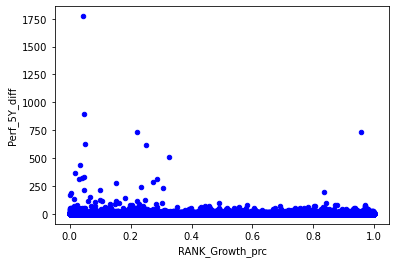

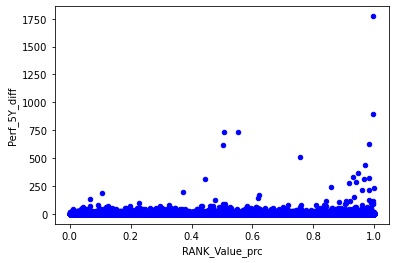

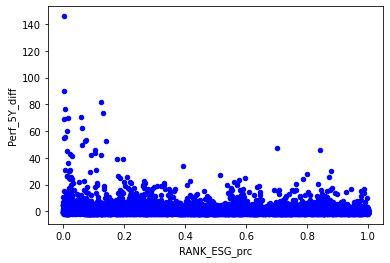

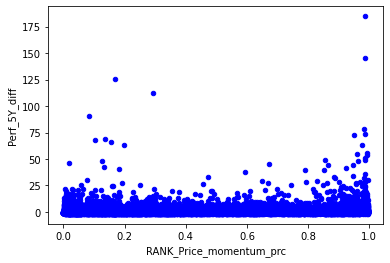

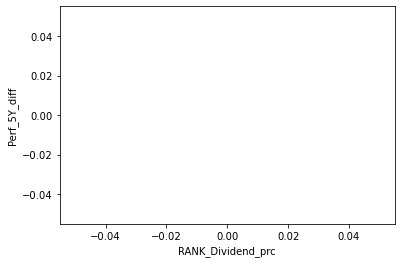

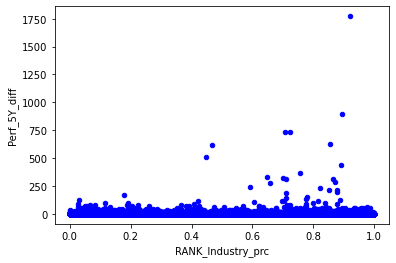

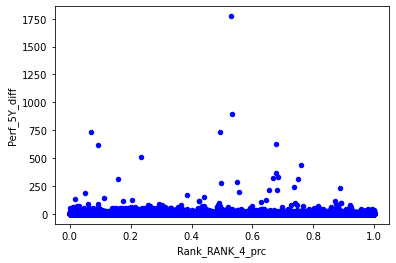

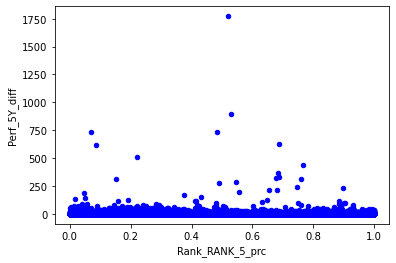

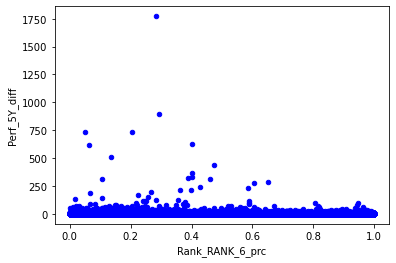

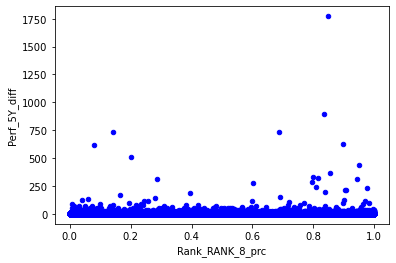

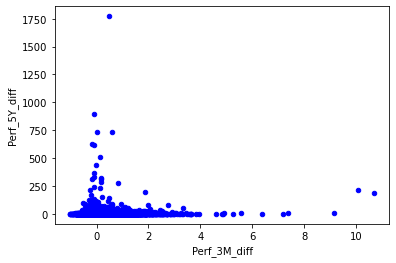

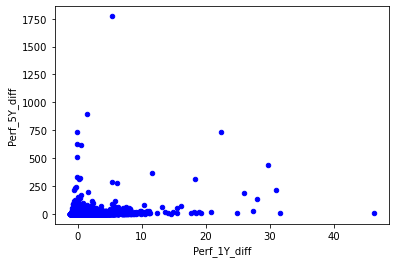

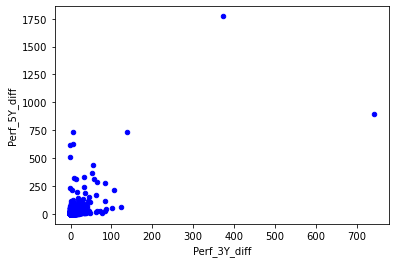

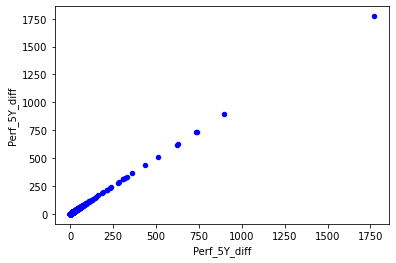

In [472]:
two_var_plot(dataset3_fin, lst_new)



### 3/ Анализ компаний по прочим параметрам

#### Для начала определим регионы с наибольшим средним ростом цены компаний 

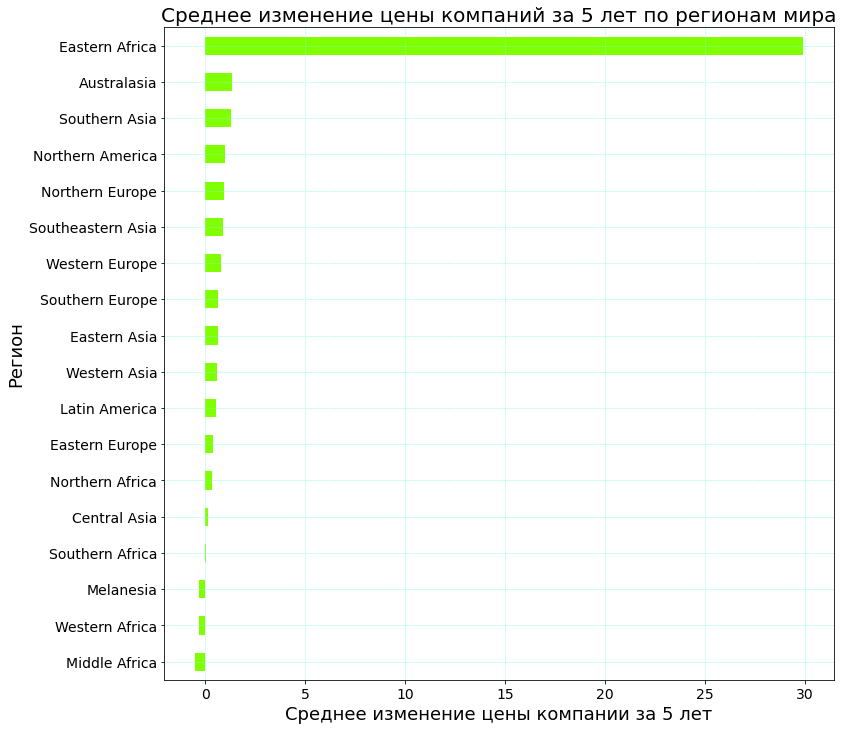

In [545]:
def bar_mean_price_per_region(dataset):
    
    df_groups = dataset.groupby(['Minor_Region_of_Headquarters'])['Perf_5Y'].mean().sort_values(ascending = True)
    
    ax = df_groups.plot.barh(color = 'chartreuse', figsize = (12, 12), fontsize = 14)
    ax.set_facecolor("white") #background color
    
    plt.title('Среднее изменение цены компаний за 5 лет по регионам мира', fontsize = 20)
    plt.xlabel('Среднее изменение цены компании за 5 лет', fontsize = 18)
    plt.ylabel('Регион', fontsize = 18)
    plt.grid(color = 'aquamarine', linestyle = '--', linewidth = 0.5)
    plt.show()

bar_mean_price_per_region(df_main)

In [ ]:
'''
Наибольший рост среднего изменения цен компаний за 5 лет наблюдается в:
- Восточной Африке (с большим отрывом)
- Австралазии
- Южной Азии
- Северной Америке
- Северной Европе. 

Для дальнейшего анализа используется регион Восточной Африки.
'''

#### Теперь определим отрасли в Восточной Африке с наибольшим средним ростом цены компаний за 5 лет

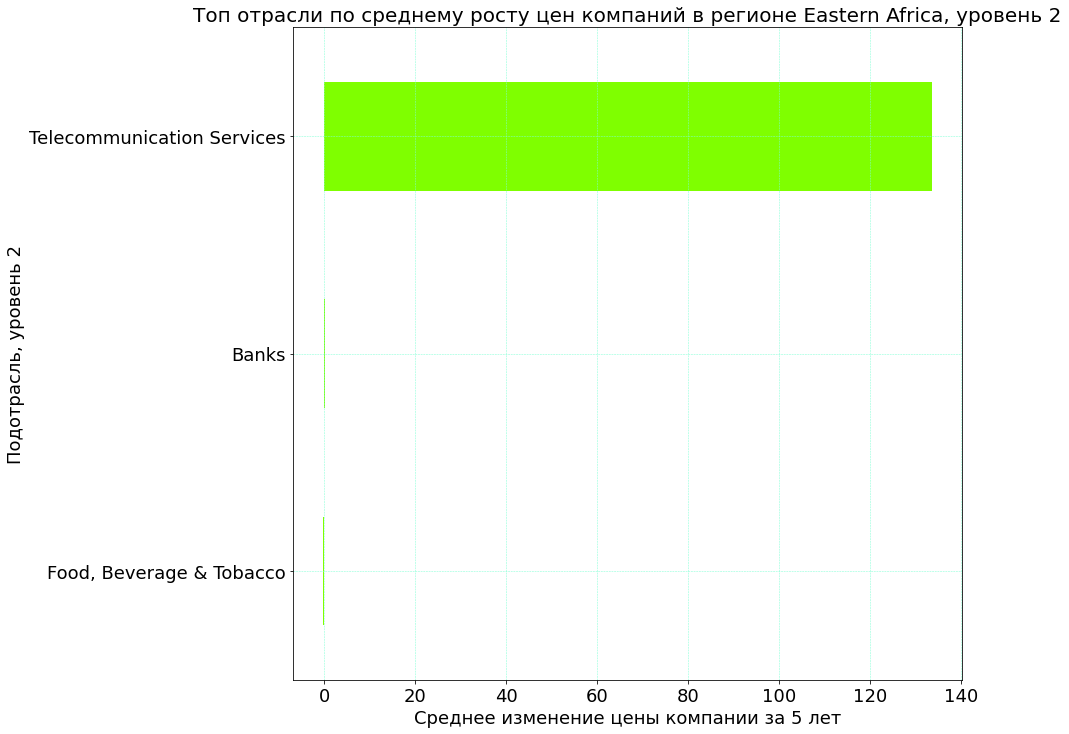

In [546]:
def industries_by_continent_best_growth_5y_2lvl(dataset, region):
    
    df_new = dataset.loc[(dataset['Minor_Region_of_Headquarters'] == region)]
    df_groups = df_new.groupby(['GICS_Industry_Group_Name'])['Perf_5Y'].mean().dropna()
    df_groups = df_groups.nlargest(15).sort_values()
    
    ax = df_groups.plot.barh(color = 'chartreuse', figsize = (12, 12), fontsize = 18)
    ax.set_facecolor("white") #background color

    plt.title(f"Топ отрасли по среднему росту цен компаний в регионе {region}, уровень 2", fontsize = 20)
    plt.xlabel('Среднее изменение цены компании за 5 лет', fontsize = 18)
    plt.ylabel('Подотрасль, уровень 2', fontsize = 18)
    plt.grid(color = 'aquamarine', linestyle = '--', linewidth = 0.5)
    plt.show()
    
    # Более детально о числовых значениях роста по подотраслям
#     print(df_groups.sort_values(ascending=False))

industries_by_continent_best_growth_5y_2lvl(dataset = df_main, region = "Eastern Africa")

In [450]:
'''
Основным драйвером роста средней цены компаний в Восточной Африке - это телекоммуникационные
услуги. Малый рост наблюдается у банков и отрицательный рост - у продуктов питания, напитков и табачных изделий
'''

'\nЛучшие показатели роста у следующих подотраслей:\n- медицинское оборудование и услуги (8.8%)\n- полупроводники и оборудование для них (8.3%)\n- программное обеспечение и ИТ услуги (7.9%)\n- телекоммуникационные услуги (7.4%)\n- фармацевтика, биотехнологии и науки о жизни (6%)\n'

#### Количество компаний по подотраслям (высокая конкуренция)

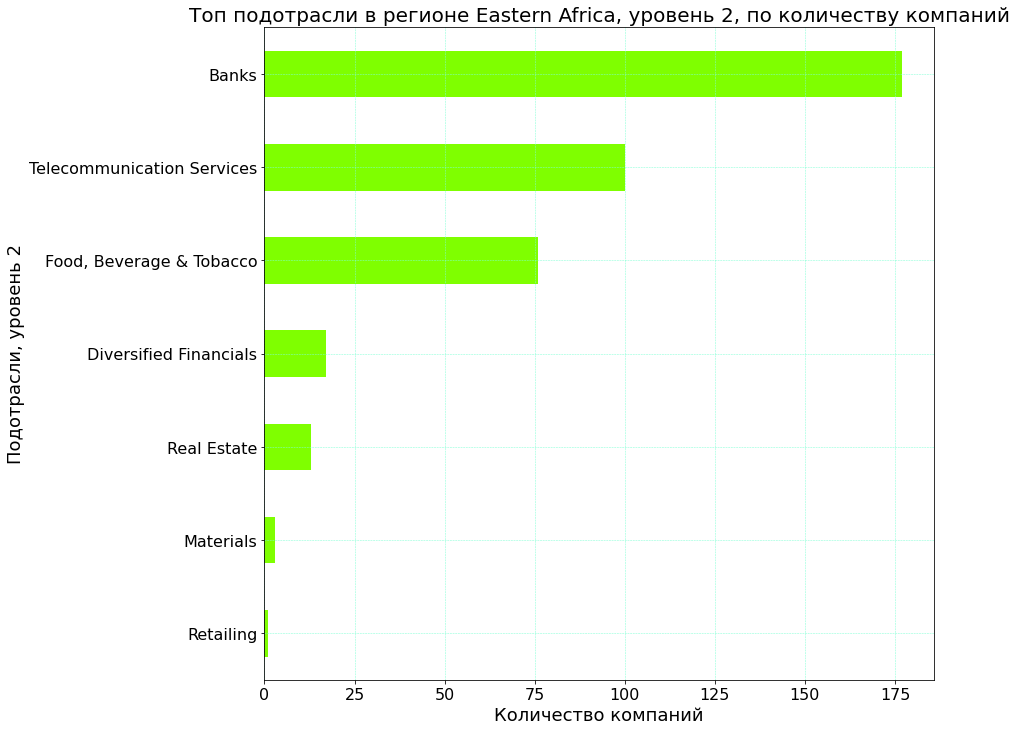

In [547]:
def number_of_companies_by_subindustry_2lvl(dataset, region):
    
    df_new = dataset.loc[(dataset['Minor_Region_of_Headquarters'] == region)]
    df_groups = df_new.groupby(['GICS_Industry_Group_Name'])['CompId'].count().sort_values(ascending = False)
    df_groups = df_groups.nlargest(15).sort_values()
  
    ax = df_groups.plot.barh(color = 'chartreuse', figsize = (12, 12), fontsize = 16)
    ax.set_facecolor("white") #background color
   
    plt.title(f'Топ подотрасли в регионе {region}, уровень 2, по количеству компаний', fontsize = 20)
    plt.xlabel('Количество компаний', fontsize = 18)
    plt.ylabel('Подотрасли, уровень 2', fontsize = 18)
    plt.grid(color = 'aquamarine', linestyle = '--', linewidth = 0.5)
    plt.show()
    
number_of_companies_by_subindustry_2lvl(df_main, 'Eastern Africa')    

In [492]:
'''
Как видно из графика Топ отрасли по количеству компаний из топовых подотраслей по среднему росту цены компаний 
нет телекоммуникационной подотрасли. Это говорит о том, что компаний относительно не так много 
как в других подотраслях экономики данного региона. В то же время присутствуют банки (топ-4).

Это говорит о том, что в данном регионе для инвестиций стоит обратить внимание для дальнейшего 
экономического анализа на:
- телекоммуникационную подотрасль.
'''


'\nКак видно из графика выше из топовых подотраслей по среднему росту цены компаний \nесть только фармацевтика, биотехнологии и науки о жизни. \nВысокая конкуренция наблюдается среди:\n- средств производства\n- материалов\n- недвижимости\n- банков\n\nЭто говорит о том, что в данном регионе для инвестиций стоит обратить внимание для дальнейшего \nэкономического анализа на:\n- телекоммуникационные услуги\n- полупроводники и оборудование для них\n- медицинское оборудование и услуги\n- программное обеспечение и ИТ услуги.\n\n'

#### Для более детального понимания можно посмотреть подотрасли, уровень 4 

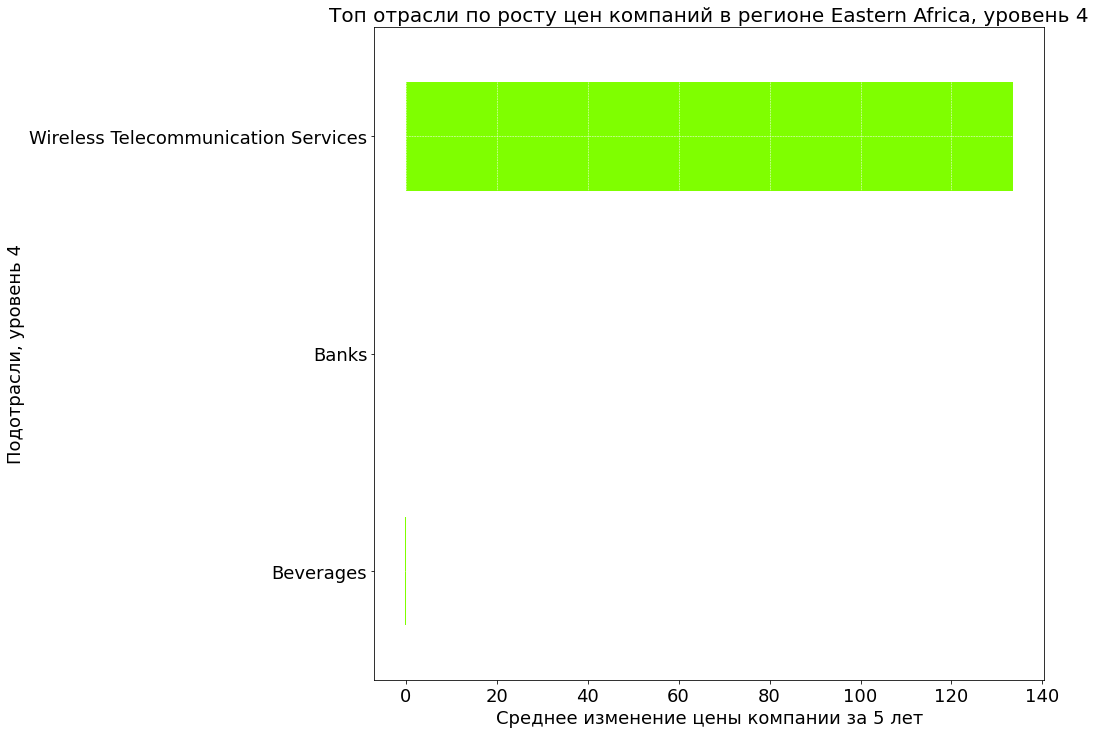

In [548]:
def industries_by_continent_best_growth_5y_4lvl(dataset, region):
    
    df_new = dataset.loc[(dataset['Minor_Region_of_Headquarters'] == region)]
    df_groups = df_new.groupby(['GICS_Industry_Name'])['Perf_5Y'].mean().dropna()
    df_groups = df_groups.nlargest(15).sort_values()
        
    ax = df_groups.plot.barh(color = 'chartreuse', figsize = (12, 12), fontsize = 18)
    ax.set_facecolor("white") #background color
   
    plt.title(f'Топ отрасли по росту цен компаний в регионе {region}, уровень 4', fontsize = 20)
    plt.xlabel('Среднее изменение цены компании за 5 лет', fontsize = 18)
    plt.ylabel('Подотрасли, уровень 4', fontsize = 18)
    plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)
    plt.show()

industries_by_continent_best_growth_5y_4lvl(dataset=df_main, region='Eastern Africa')

In [ ]:
'''
Под телекоммуникационной отраслью в данном регионе подразумевается услуги беспроводной связи.

Стоит отметить, что для других регионов количество индустрий разнообразнее, например, для 
Западной Европы и Северной Америки.
'''